# Interaktives Übungsblatt

### Vorgeplänkel

In [146]:
import sys
# Diese Zeile muss angepasst werden!
sys.path.append("/home/moser/MG_2016/pyMG/")
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
import pymg
from project.helmholtz1d import Helmholtz1D
from project.helmholtz1d_periodic import Helmholtz1D_Periodic
from project.gauss_seidel import GaussSeidel
from project.weighted_jacobi import WeightedJacobi
from project.pfasst.plot_tools import eigvalue_plot_list, matrix_plot, matrix_row_plot
from project.pfasst.transfer_tools import to_dense
from project.pfasst.matrix_method_tools import matrix_power

In [148]:
def plot_3_eigvalueplots(A_p,A_z,A_m):
    eig_p.append(sp.linalg.eigvals(to_dense(A_p)))
    eig_z.append(sp.linalg.eigvals(to_dense(A_z)))
    eig_m.append(sp.linalg.eigvals(to_dense(A_m)))
    
    real_part_p = np.real(eig_p[-1])
    img_part_p = np.imag(eig_p[-1])
    
    real_part_z = np.real(eig_z[-1])
    img_part_z = np.imag(eig_z[-1])
    
    real_part_m = np.real(eig_m[-1])
    img_part_m = np.imag(eig_m[-1])
    fig1, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(15,3))
    
    ax1.plot(real_part_p,img_part_p,'ro')
    ax1.set_xlabel("real part")
    ax1.set_ylabel("img part")
    ax1.set_title('eigenvalues')
    
    ax2.plot(real_part_z,img_part_z,'bo')
    ax2.set_xlabel("real part")
    ax2.set_ylabel("img part")
    ax2.set_title('eigenvalues')
    
    ax3.plot(real_part_m,img_part_m,'go')
    ax3.set_xlabel("real part")
    ax3.set_ylabel("img part")
    ax3.set_title('eigenvalues')
    
    fig1.tight_layout()
    plt.show()

def plot_2_eigvalueplots(A_p,A_z):
    eig_p.append(sp.linalg.eigvals(to_dense(A_p)))
    eig_z.append(sp.linalg.eigvals(to_dense(A_z)))

    
    real_part_p = np.real(eig_p[-1])
    img_part_p = np.imag(eig_p[-1])
    
    real_part_z = np.real(eig_z[-1])
    img_part_z = np.imag(eig_z[-1])
    
    fig1, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,3))
    
    ax1.plot(real_part_p,img_part_p,'ro')
    ax1.set_xlabel("real part")
    ax1.set_ylabel("img part")
    ax1.set_title('eigenvalues')
    
    ax2.plot(real_part_z,img_part_z,'bo')
    ax2.set_xlabel("real part")
    ax2.set_ylabel("img part")
    ax2.set_title('eigenvalues')
    
    fig1.tight_layout()
    plt.show()

### Systemmatrizen

Wir werden im Weiteren `pyMG` nutzen um die Systemmatrix für gegebene Parameter $ n$ und $\sigma$ für das Helmholtz-Problem in 1D aufzustellen.

In [149]:
def system_matrix_hh1d(n,sig):
    hh1d = Helmholtz1D(n, sig)
    return hh1d.A

def system_matrix_hh1d_periodic(n,sig):
    hh1d = Helmholtz1D_Periodic(n, sig)
    return hh1d.A

def spec_rad(A):
    return np.max(np.abs(sp.linalg.eigvals(to_dense(A))))


Plotten Sie mithilfe von `matrix_plot` die Systemmatrizen für $\sigma = 0$ und $n=10$.

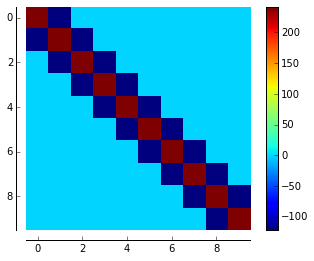

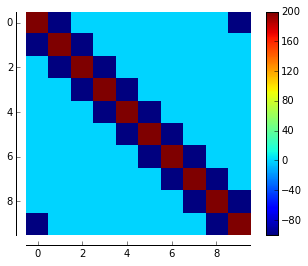

In [150]:
matrix_plot(to_dense(system_matrix_hh1d(10,0)))
matrix_plot(to_dense(system_matrix_hh1d_periodic(10,0)))

**Aufgabe:** Plotten Sie mithilfe von `plot_3_eigvalueplots` die Eigenwerte der Systemmatrix für $n \in [5,10,20]$ und $\sigma = 100$,$\sigma = -100$ und $\sigma = 0$.

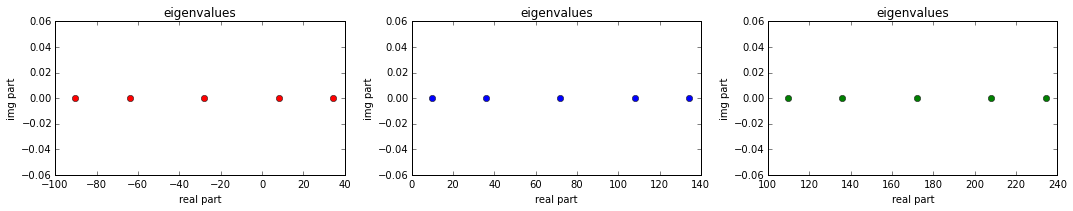

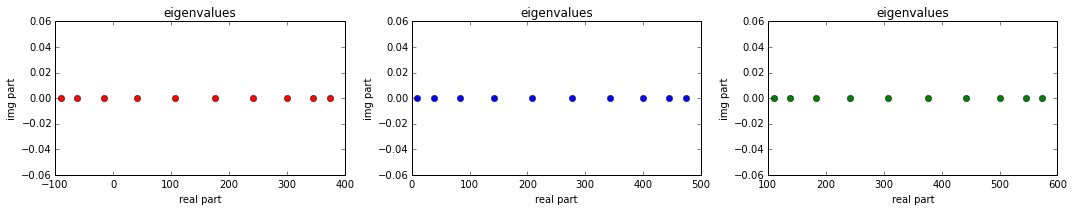

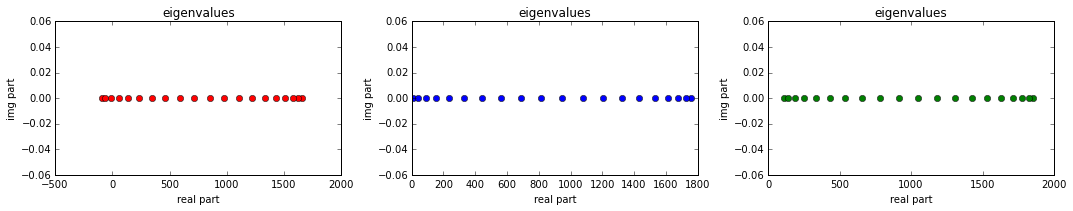

In [151]:
eig_p=[]
eig_m=[]
eig_z=[]
for n in [5,10,20]:
    A_p = system_matrix_hh1d(n,100.0)
    A_z = system_matrix_hh1d(n,0.0)
    A_m = system_matrix_hh1d(n,-100.0)
    
    plot_3_eigvalueplots(A_p, A_z, A_m)


**Frage**: Wie unterscheiden sich die Spektren der verschiedenen Systemmatrizen?

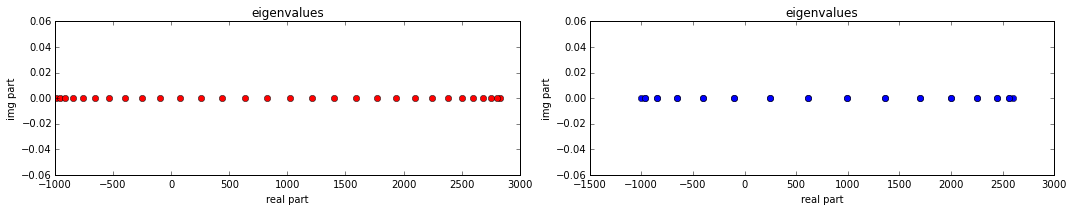

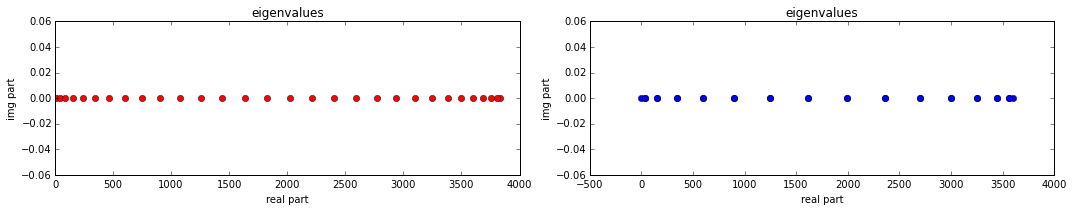

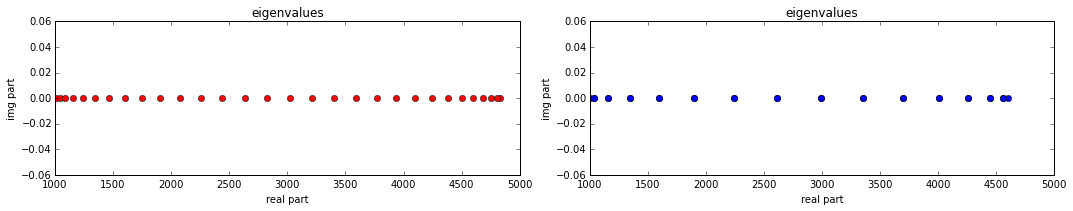

In [152]:
n=30
for sigma in [1000,0,-1000]:
    plot_2_eigvalueplots(system_matrix_hh1d(n,sigma),system_matrix_hh1d_periodic(n,sigma))

### Iterationsmatrizen des Glätters

**Frage**

Weitaus spannender sind die Spektralradiien der Iterationsmatrizen eines Glätters. Warum?

In [153]:
def iteration_matrix_wjac(n, sigma, periodic=True):
    if periodic:
        A = system_matrix_hh1d_periodic(n,sigma)
    else:
        A = system_matrix_hh1d(n,sigma)
        
    wjac = WeightedJacobi(A, 2.0/3.0)
    P_inv = wjac.Pinv
    return np.eye(n) - P_inv.dot(A)

**Aufgabe**
Plotten Sie die Iterationsmatrix des gewichteten Jacobi für verschiedene $\sigma$. Zu welcher Klasse gehört diese Iterationsmatrix.

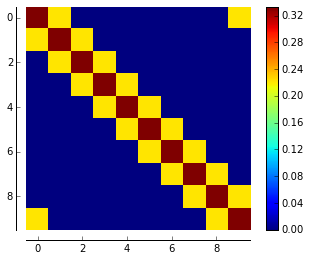

In [154]:
matrix_plot(iteration_matrix_wjac(10,-100))

In [155]:
n = 10
sigma_range = np.linspace(-100,100,100)
sr_wjac_periodic = map(lambda sig : spec_rad(iteration_matrix_wjac(n, sig,periodic=True)), sigma_range)
sr_wjac = map(lambda sig : spec_rad(iteration_matrix_wjac(n, sig,periodic=False)), sigma_range)

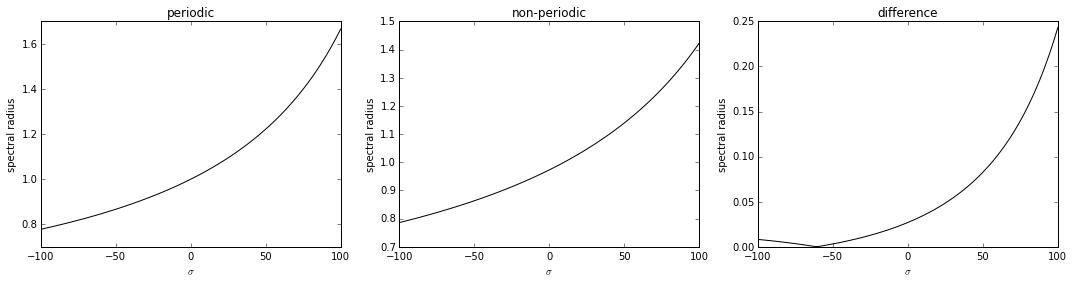

In [156]:
# Achsen festhalten

fig1, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(15,4))

ax1.plot(sigma_range, sr_wjac_periodic,'k-')
ax1.set_xlabel('$\sigma$')
ax1.set_ylabel("spectral radius")
ax1.set_title('periodic')

ax2.plot(sigma_range, sr_wjac,'k-')
ax2.set_xlabel('$\sigma$')
ax2.set_ylabel("spectral radius")
ax2.set_title('non-periodic')

ax3.plot(sigma_range, np.abs(np.asarray(sr_wjac) - np.asarray(sr_wjac_periodic)),'k-')
ax3.set_xlabel('$\sigma$')
ax3.set_ylabel("spectral radius")
ax3.set_title('difference')

fig1.tight_layout()
plt.show()

**Frage** : Wie verhalten sich die Spektren für das periodische Problem zu den Problemen mit Dirichletrandbedingungen für verschiedene $\sigma$ und $n$? Erkenntnis durch ausprobieren!

**Aufgabe**

Nutzen Sie die folgende Funktion, um die Iterationsmatrix für Gauß-Seidel abhängig von $\sigma$ und $n$ zu berechne. Finden Sie heraus wie sich der Spektralradius für verschiedene $\sigma$ und den periodischen, sowie nicht periodischen Fall verhält. 

In [157]:
def iteration_matrix_gs(n, sigma, periodic=True):
    
    if periodic:
        A = system_matrix_hh1d_periodic(n,sigma)
    else:
        A = system_matrix_hh1d(n,sigma)
        
    gs = GaussSeidel(A)
    P_inv = gs.Pinv
    return np.eye(n) - P_inv.dot(A)

**Frage**

Ist die Iterationsmatrix zyklisch?

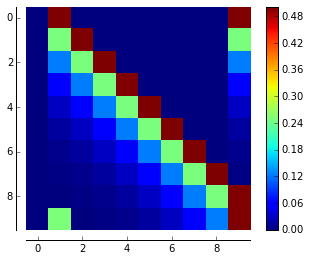

In [158]:
matrix_plot(iteration_matrix_gs(10,0,True))

In [159]:
sr_gs_periodic = map(lambda sig : spec_rad(iteration_matrix_gs(n, sig,periodic=True)), sigma_range)
sr_gs = map(lambda sig : spec_rad(iteration_matrix_gs(n, sig,periodic=False)), sigma_range)

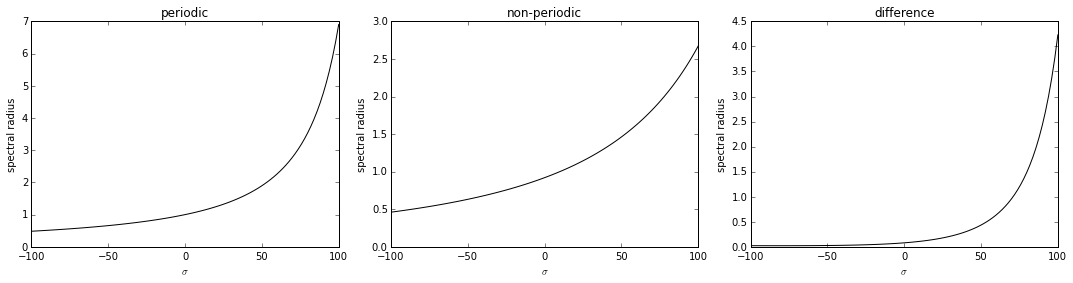

In [160]:

fig1, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(15,4))

ax1.plot(sigma_range, sr_gs_periodic,'k-')
ax1.set_xlabel('$\sigma$')
ax1.set_ylabel("spectral radius")
ax1.set_title('periodic')

ax2.plot(sigma_range, sr_gs,'k-')
ax2.set_xlabel('$\sigma$')
ax2.set_ylabel("spectral radius")
ax2.set_title('non-periodic')

ax3.plot(sigma_range, np.abs(np.asarray(sr_gs) - np.asarray(sr_gs_periodic)),'k-')
ax3.set_xlabel('$\sigma$')
ax3.set_ylabel("spectral radius")
ax3.set_title('difference')

fig1.tight_layout()
plt.show()

**Frage** : Wie verhalten sich die Spektren für das periodische Problem zu den Problemen mit Dirichletrandbedingungen für verschiedene $\sigma$ und $n$? Erkenntnis durch ausprobieren!

### Das Leben im Fourier-Raum

Wir können mithilfe der Moden
$$v^{(m)} = \frac{1}{\sqrt{n}} \begin{pmatrix}1 \\ e^{-2\pi i m/n} \\ \vdots \\  e^{-2\pi i m(n-1)/n} \end{pmatrix} $$
eine Transformation definieren. Die uns den Operatoren/Matrizen in den Fourier-Raum übersetzt.

In [161]:
def transformation_matrix_fourier_basis(N):
    psi = np.zeros((N,N),dtype=np.complex128)
    for i in range(N):
        for j in range(N):
            psi[i,j] = np.exp(2*np.pi*1.0j*j*i/N)
    return psi/np.sqrt(N)

def plot_fourier_transformed(A):
    A = to_dense(A)
    n = A.shape[0]
    PSI_trafo = transformation_matrix_fourier_basis(n)
    PSI_trafo_inv =  sp.linalg.inv(PSI_trafo)
    A_traf = np.dot(PSI_trafo_inv, np.dot(A,PSI_trafo))
    matrix_row_plot([A,np.abs(A_traf)])

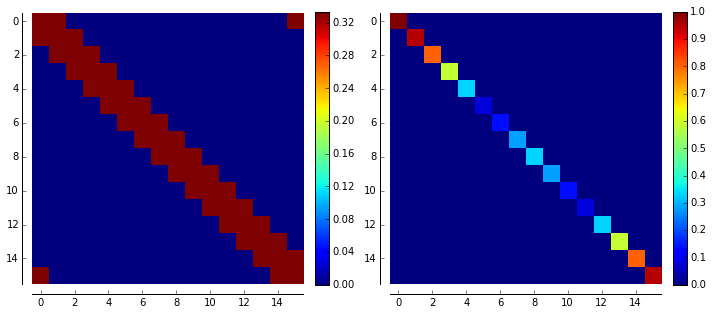

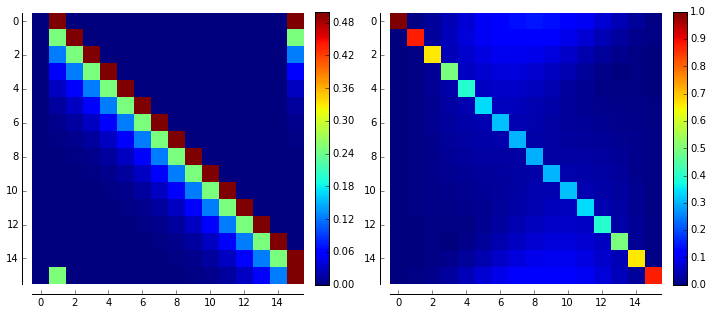

In [162]:
plot_fourier_transformed(iteration_matrix_wjac(16,0))
plot_fourier_transformed(iteration_matrix_gs(16,0))

**Frage:** Was ist hier passiert? Und was passiert für unterschiedliche $\sigma$?

Die hohen Eigenwerte extrahiert man nun durch auspicken der richtigen Diagonalwerte nach der Transformation, falls die Matrix zyklisch ist. 

In [163]:
def get_theta_eigvals(A, plot=False,which='all'):
    A = to_dense(A)
    n = A.shape[0]
    PSI_trafo = transformation_matrix_fourier_basis(n)
    PSI_trafo_inv =  sp.linalg.inv(PSI_trafo)
    A_traf = np.dot(PSI_trafo_inv, np.dot(A,PSI_trafo))
    if plot:
        matrix_plot(np.abs(A_traf))
    eigvals =  np.asarray(map(lambda k : A_traf[k,k],range(n)))
    if which is 'high':
        return eigvals[np.ceil(n/4):np.floor(3.0*n/4)]
    elif which is 'low':
        return np.hstack([eigvals[:np.floor(n/4)],eigvals[np.ceil(3.0*n/4):]])
    else:
        return eigvals

**Frage**

Verhält sich der gewichtete Jacobi Glätter wie in der Vorlesung vorraussgesagt?

In [164]:
print np.abs(get_theta_eigvals(iteration_matrix_wjac(16,0), plot=False,which='high'))
print np.abs(get_theta_eigvals(iteration_matrix_wjac(16,0), plot=False,which='low'))

[ 0.33333333  0.07821105  0.13807119  0.28258636  0.33333333  0.28258636
  0.13807119  0.07821105]
[ 1.          0.94925302  0.80473785  0.58845562  0.33333333  0.58845562
  0.80473785  0.94925302]


/home11/moser/.pyenv/versions/anaconda-2.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home11/moser/.pyenv/versions/anaconda-2.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


**Frage**: 

Wie gut passen eigentlich die Diagonalwerte der Fourier-transformierten Iterationsmatrix mit den Eigenwerten der Matrix für Gauss-Seidel zusammen? Was könnte man machen um Sie zu vergleichen.

In [165]:
It_gs = iteration_matrix_gs(16,0)
eigvals = sp.linalg.eigvals(It_gs)
diagonals = get_theta_eigvals(It_gs)

Eine einfache Methode wäre:

In [166]:
sum_eig = np.sum(np.abs(eigvals))
sum_diag = np.sum(np.abs(diagonals))
print sum_eig
print sum_diag

7.80830043773
8.07864773317


**Aufgabe**
Überlegt euch eigene Vergleichsmethoden und variiert $n$,$\sigma$ und die Periodizität, um herauszufinden, wann die 
`get_theta_eigvals` Methode die Eigenwerte gut Schätzen kann.

In [167]:
def spec_rad_estimate(A):
    diagonals = get_theta_eigvals(A)
    return np.max(np.abs(diagonals))

In [168]:
sr_gs_periodic = map(lambda sig : spec_rad(iteration_matrix_gs(16, sig,periodic=True)), sigma_range)
sr_gs = map(lambda sig : spec_rad(iteration_matrix_gs(16, sig,periodic=False)), sigma_range)
md_gs_periodic = map(lambda sig : spec_rad_estimate(iteration_matrix_gs(16, sig,periodic=True)), sigma_range)
md_gs = map(lambda sig : spec_rad_estimate(iteration_matrix_gs(16, sig,periodic=False)), sigma_range)

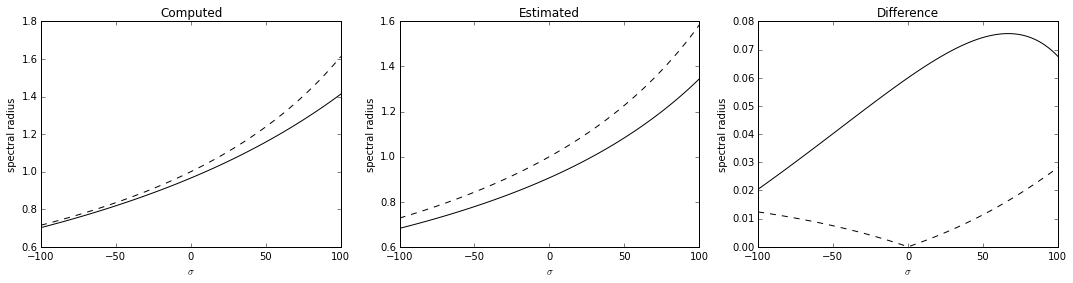

In [169]:
fig1, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(15,4))

ax1.plot(sigma_range, sr_gs,'k-',sigma_range, sr_gs_periodic,'k--')

ax1.set_xlabel('$\sigma$')
ax1.set_ylabel("spectral radius")
ax1.set_title('Computed')

ax2.plot(sigma_range, md_gs,'k-',sigma_range, md_gs_periodic,'k--')
ax2.set_xlabel('$\sigma$')
ax2.set_ylabel("spectral radius")
ax2.set_title('Estimated')

ax3.plot(sigma_range, np.abs(np.asarray(sr_gs) - np.asarray(md_gs)),'k-',
         sigma_range, np.abs(np.asarray(sr_gs_periodic) - np.asarray(md_gs_periodic)),'k--')
ax3.set_xlabel('$\sigma$')
ax3.set_ylabel("spectral radius")
ax3.set_title('Difference')

fig1.tight_layout()
plt.show()

### Zweigitter-Iterationsmatrix

In [170]:
from project.linear_transfer import LinearTransfer
from project.linear_transfer_periodic import LinearTransferPeriodic

Im Folgenden werden wir nun mithilfe des `pymg` frameworks die Zweigitter-Iterationsmatrix für ein einfaches Multigrid 
aufstellen. Wir beginnen mit der Grobgitterkorrektur.

In [171]:
def coarse_grid_correction(n,nc, sigma):
    A_fine = to_dense(system_matrix_hh1d(n,sigma))
    A_coarse = to_dense(system_matrix_hh1d(nc,sigma))
    A_coarse_inv = sp.linalg.inv(A_coarse)
    lin_trans = LinearTransfer(n, nc)
    prolong = to_dense(lin_trans.I_2htoh)
    restrict = to_dense(lin_trans.I_hto2h)
    return np.eye(n)- np.dot(prolong.dot(A_coarse_inv.dot(restrict)), A_fine)

**Buntebilderaufgabe:** Nutze `plot_fourier_transformed` um für $n=31$, $n_c=15$ und verschiedene $\sigma\in[-1000,1000]$ um die Grobgitterkorrekturiterationsmatrizen und deren Fourier-transformierten zu plotten.

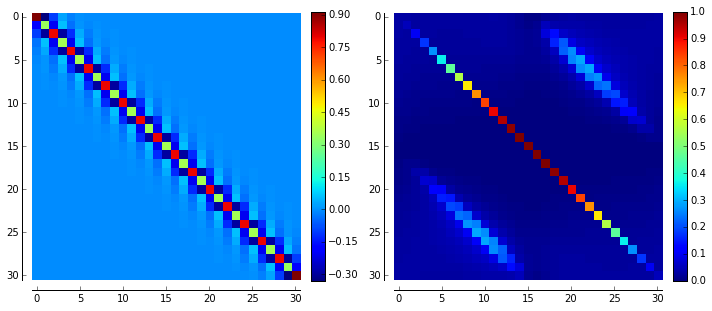

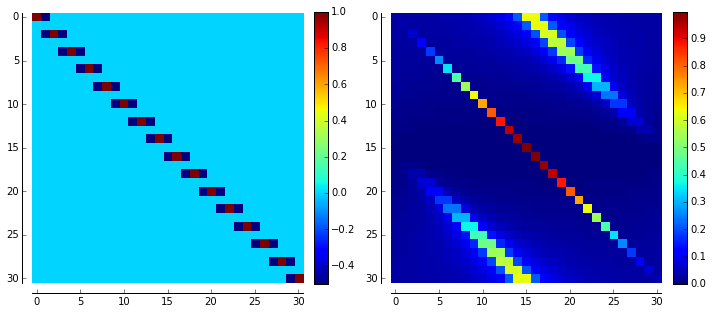

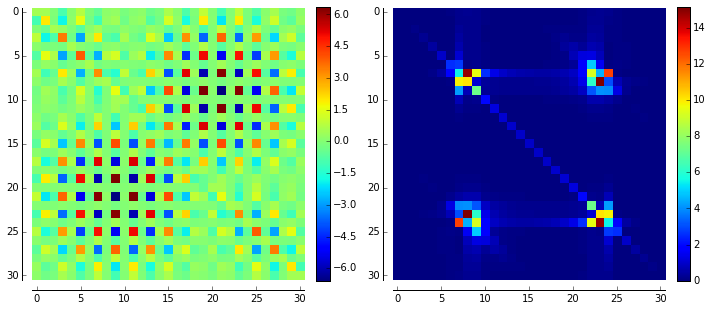

In [172]:
plot_fourier_transformed(coarse_grid_correction(31,15,-1000))
plot_fourier_transformed(coarse_grid_correction(31,15,0))
plot_fourier_transformed(coarse_grid_correction(31,15,1000))

In [173]:
def coarse_grid_correction_periodic(n,nc, sigma):
    A_fine = to_dense(system_matrix_hh1d_periodic(n,sigma))
    A_coarse = to_dense(system_matrix_hh1d_periodic(nc,sigma))
    A_coarse_inv = sp.linalg.inv(A_coarse)
    lin_trans = LinearTransferPeriodic(n, nc)
    prolong = to_dense(lin_trans.I_2htoh)
    restrict = to_dense(lin_trans.I_hto2h)
    return np.eye(n)- np.dot(prolong.dot(A_coarse_inv.dot(restrict)), A_fine)

**Aufgabe:** 

Nutzen Sie `coarse_grid_correction_periodic` für die Grobgitterkorrektur für das periodische Problem und plotten Sie nochmal für verschiedene $\sigma$ die Matrizen und ihre Fourier-transformierten.

**Frage:** 

Was genau passiert bei $\sigma = 0$ und in der Nähe davon? Für welche $n_f$ und $n_c$ ist die Grobgitterkorrektur für ein periodisches Problem sinnvoll? Was fällt sonst auf? Und was hat das Ganze mit der Vorlesung zu tun?

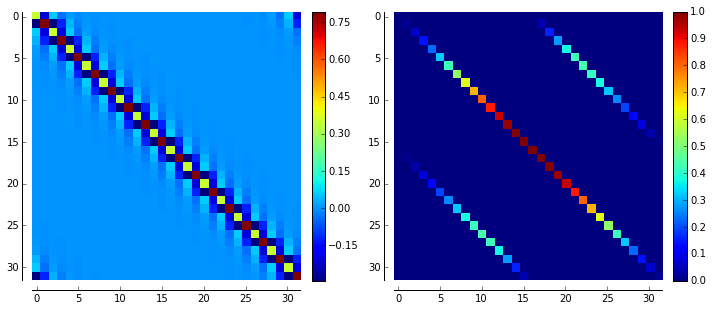

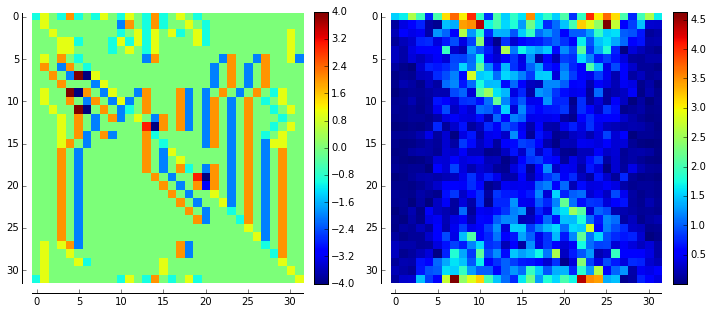

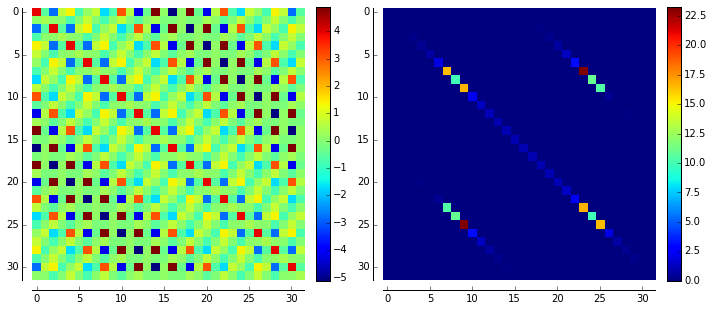

In [174]:
plot_fourier_transformed(coarse_grid_correction_periodic(32,16,-1000))
plot_fourier_transformed(coarse_grid_correction_periodic(32,16,-0.00))
plot_fourier_transformed(coarse_grid_correction_periodic(32,16,1000))

Nun verwenden wir die Grobgitterkorrektur und die Iterationsmatrizen der Glätter um die Zweigitteriterationsmatrix zu berrechnen.

In [175]:
def two_grid_it_matrix(n,nc, sigma, nu1=3,nu2=3,typ='wjac'):
    cg = coarse_grid_correction(n,nc,sigma)
    if typ is 'wjac':
        smoother = iteration_matrix_wjac(n,sigma, periodic=False)
    if typ is 'gs':
        smoother = iteration_matrix_gs(n,sigma, periodic=False)
    
    pre_sm = matrix_power(smoother, nu1)
    post_sm = matrix_power(smoother, nu2)
    
    return pre_sm.dot(cg.dot(post_sm))    

**Buntebilderaufgabe:**

Nutzen Sie `plot_fourier_transformed` um für $n=15$, $n_c=7$ und verschiedene $\sigma\in[-1000,1000]$ um die Zweigittermatrizen und deren Fourier-transformierten zu plotten.

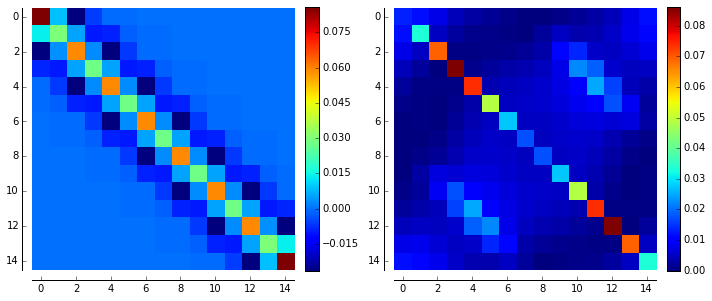

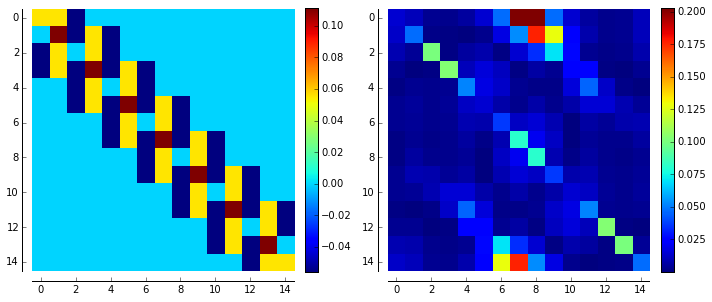

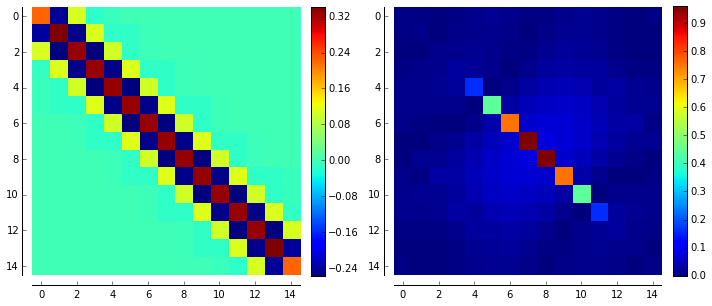

In [176]:
plot_fourier_transformed(two_grid_it_matrix(15,7,-1000,typ='wjac'))
plot_fourier_transformed(two_grid_it_matrix(15,7,0,typ='wjac'))
plot_fourier_transformed(two_grid_it_matrix(15,7,1000,typ='wjac'))

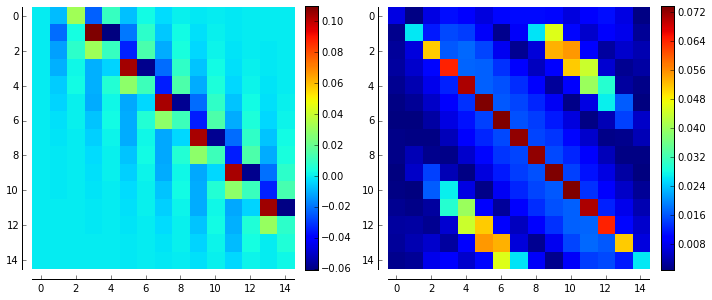

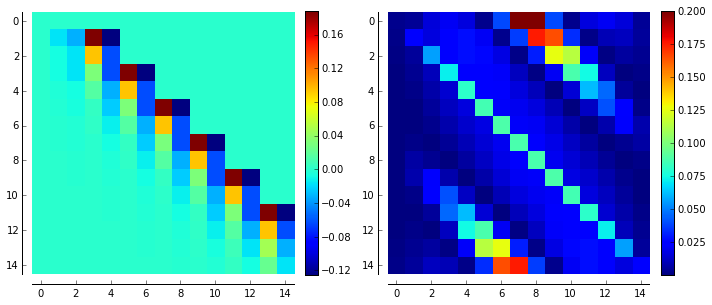

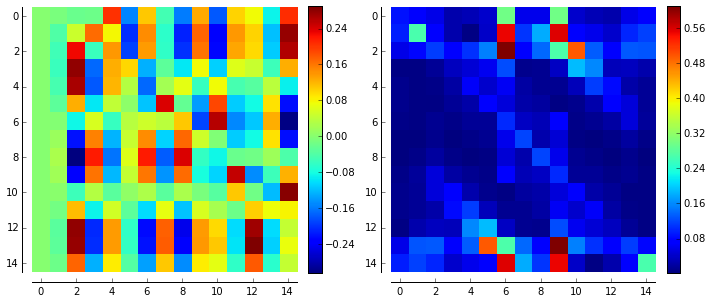

In [177]:
plot_fourier_transformed(two_grid_it_matrix(15,7,-100,typ='gs'))
plot_fourier_transformed(two_grid_it_matrix(15,7,0,typ='gs'))
plot_fourier_transformed(two_grid_it_matrix(15,7,100,typ='gs'))

In [178]:
sr_2grid_var_sigma = map(lambda sig : spec_rad(two_grid_it_matrix(15,7,sig)), sigma_range)

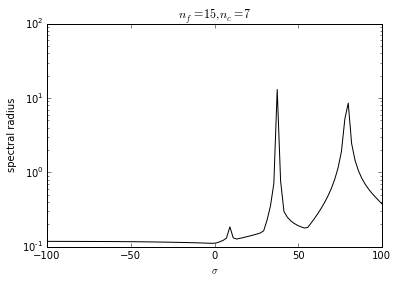

In [179]:
plt.semilogy(sigma_range, sr_2grid_var_sigma,'k-')
plt.title('$n_f = 15, n_c = 7$')
plt.xlabel('$\sigma$')
plt.ylabel("spectral radius")

In [180]:
nf_range = map(lambda k: 2**k-1,range(3,10))
nc_range = map(lambda k: 2**k-1,range(2,9))
sr_2grid_m1000 = map(lambda nf,nc : spec_rad(two_grid_it_matrix(nf,nc,-1000)), nf_range, nc_range)
sr_2grid_0 = map(lambda nf,nc : spec_rad(two_grid_it_matrix(nf,nc,0)), nf_range, nc_range)
sr_2grid_p1000 = map(lambda nf,nc : spec_rad(two_grid_it_matrix(nf,nc,1000)), nf_range, nc_range)

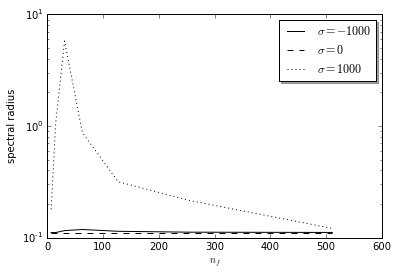

In [181]:
plt.semilogy(nf_range, sr_2grid_m1000,'k-',nf_range, sr_2grid_0,'k--',nf_range, sr_2grid_p1000,'k:')
plt.xlabel('$n_f$')
plt.ylabel("spectral radius")
plt.legend(("$\sigma = -1000$","$\sigma = 0$","$\sigma = 1000$"),'upper right',shadow = True)

** Frage **

Was sieht man in den beiden vorhergehenden Plots?

Als nächstes behandeln wir den periodischen Fall.

In [182]:
def two_grid_it_matrix_periodic(n,nc, sigma, nu1=3,nu2=3,typ='wjac'):
    cg = coarse_grid_correction_periodic(n,nc,sigma)
    if typ is 'wjac':
        smoother = iteration_matrix_wjac(n,sigma, periodic=True)
    if typ is 'gs':
        smoother = iteration_matrix_gs(n,sigma, periodic=True)
    
    pre_sm = matrix_power(smoother, nu1)
    post_sm = matrix_power(smoother, nu2)

    return pre_sm.dot(cg.dot(post_sm))    

**Buntebilderaufgabe:**

Nutzen Sie `plot_fourier_transformed` um für $n=16$, $n_c=8$ und verschiedene $\sigma\in[-1000,1000]$ um die Zweigittermatrizen und deren Fourier-transformierten zu plotten.

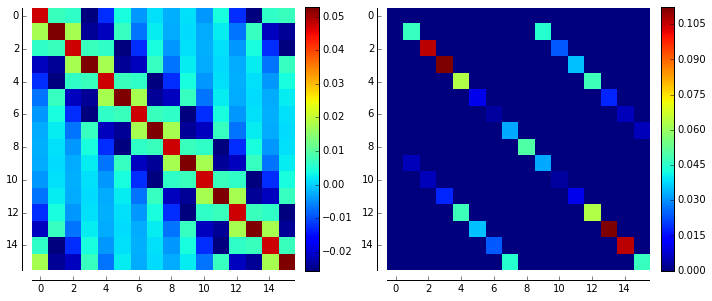

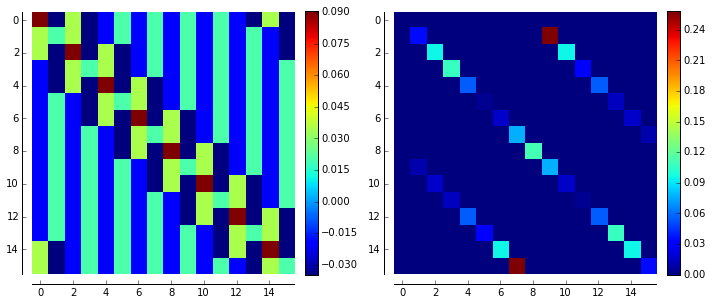

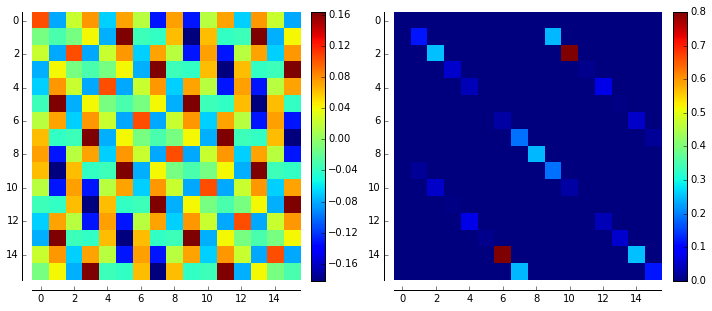

In [183]:
plot_fourier_transformed(two_grid_it_matrix_periodic(16,8,-100,typ='wjac'))
plot_fourier_transformed(two_grid_it_matrix_periodic(16,8,0.01,typ='wjac'))
plot_fourier_transformed(two_grid_it_matrix_periodic(16,8,100,typ='wjac'))

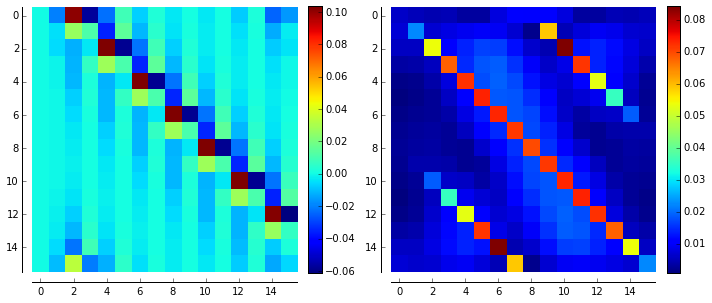

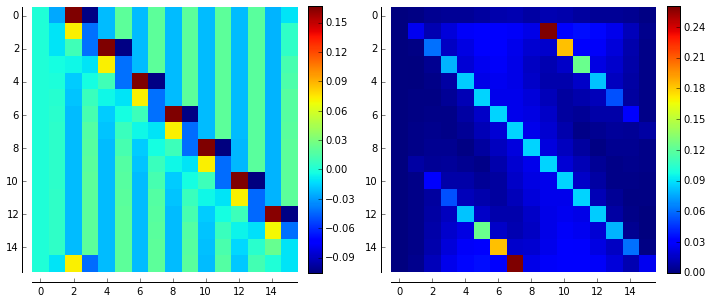

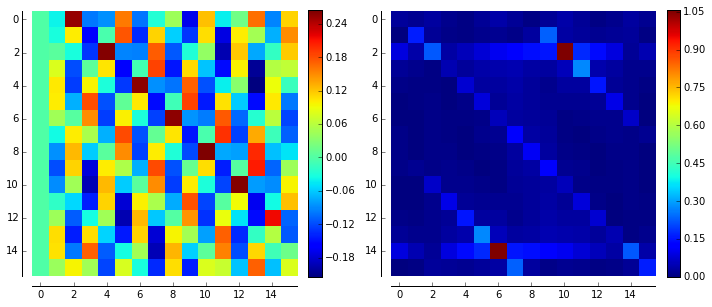

In [184]:
plot_fourier_transformed(two_grid_it_matrix_periodic(16,8,-100,typ='gs'))
plot_fourier_transformed(two_grid_it_matrix_periodic(16,8,-0.01,typ='gs'))
plot_fourier_transformed(two_grid_it_matrix_periodic(16,8,100,typ='gs'))

**Frage**

Was fällt auf? (Das sind die besten Fragen... zumindest für den Übungsleiter.)

**Aufgabe:** 

Nutzen Sie die Funktion `two_grid_it_matrix_periodic` für den periodischen Fall und plotten Sie den Spektralradius über $\sigma$ und den Spektralradius über $n$ für 3 verschiedene $\sigma$.

In [185]:
sr_2grid_var_sigma_periodic = map(lambda sig : spec_rad(two_grid_it_matrix_periodic(16,8,sig)), sigma_range)

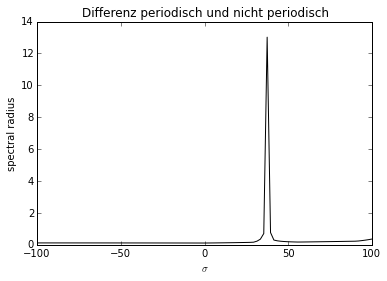

In [186]:
plt.plot(sigma_range,np.asarray(sr_2grid_var_sigma_periodic),'k-')
plt.title('Differenz periodisch und nicht periodisch')
plt.xlabel('$\sigma$')
plt.ylabel("spectral radius")

In [187]:
nf_range = map(lambda k: 2**k,range(3,10))
nc_range = map(lambda k: 2**k,range(2,9))
sr_2grid_m1000_p = map(lambda nf,nc : spec_rad(two_grid_it_matrix_periodic(nf,nc,-1000)), nf_range, nc_range)
sr_2grid_0_p = map(lambda nf,nc : spec_rad(two_grid_it_matrix_periodic(nf,nc,0.01)), nf_range, nc_range)
sr_2grid_p1000_p = map(lambda nf,nc : spec_rad(two_grid_it_matrix_periodic(nf,nc,1000)), nf_range, nc_range)

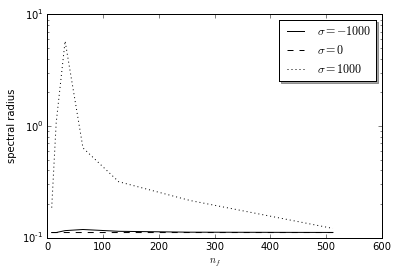

In [188]:
plt.semilogy(nf_range, sr_2grid_m1000_p,'k-',nf_range, sr_2grid_0_p,'k--',nf_range, sr_2grid_p1000_p,'k:')
plt.xlabel('$n_f$')
plt.ylabel("spectral radius")
plt.legend(("$\sigma = -1000$","$\sigma = 0$","$\sigma = 1000$"),'upper right',shadow = True)

**Aufgabe:** Plotten sie die Differenzen zwischen dem periodischem und nicht-periodischem Fall.

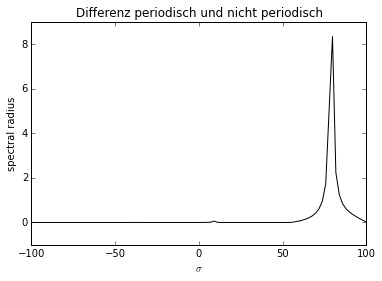

In [189]:
plt.plot(sigma_range, np.asarray(sr_2grid_var_sigma)-np.asarray(sr_2grid_var_sigma_periodic),'k-')
plt.title('Differenz periodisch und nicht periodisch')
plt.xlabel('$\sigma$')
plt.ylabel("spectral radius")

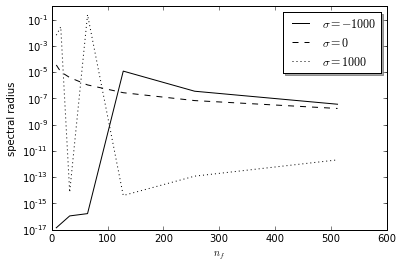

In [190]:
plt.semilogy(nf_range, np.abs(np.asarray(sr_2grid_m1000_p) - np.asarray(sr_2grid_m1000)),'k-',
             nf_range, np.abs(np.asarray(sr_2grid_0_p) - np.asarray(sr_2grid_0)),'k--',
             nf_range, np.abs(np.asarray(sr_2grid_p1000_p) - np.asarray(sr_2grid_p1000)),'k:')
plt.xlabel('$n_f$')
plt.ylabel("spectral radius")
plt.legend(("$\sigma = -1000$","$\sigma = 0$","$\sigma = 1000$"),'upper right',shadow = True)

**Bonusbuntebilderaufgabe**

Vergleicht analog zu den Eigenwertplots der Systemmatrizen, die Eigenwertplots der Zweigitteriterationsmatrizen.

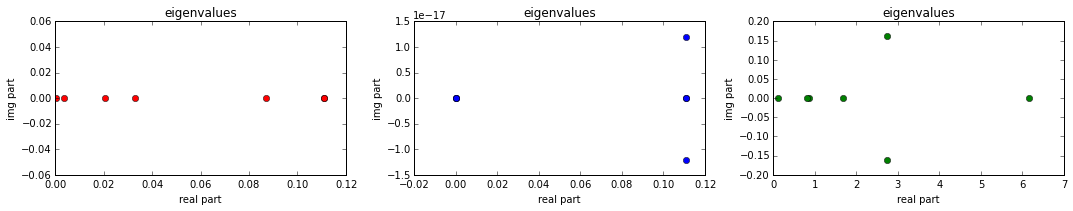

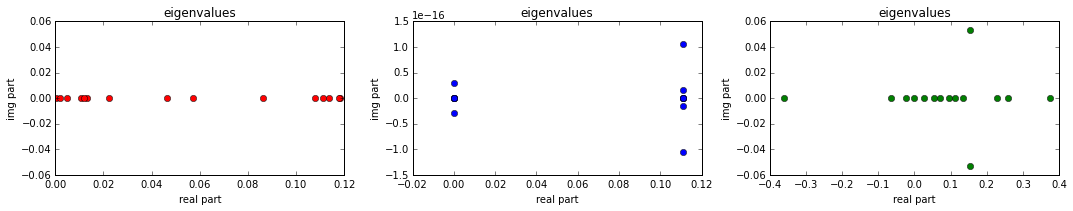

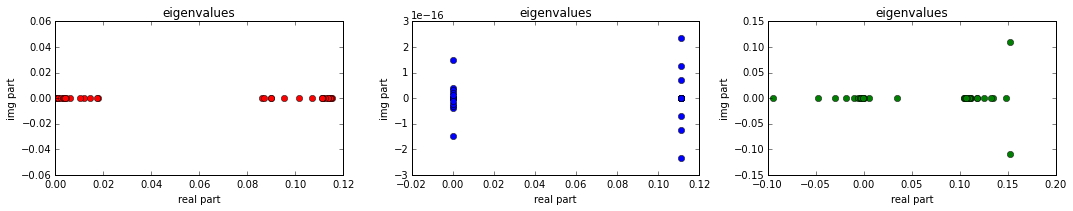

In [191]:
eig_p=[]
eig_m=[]
eig_z=[]
for nf,nc in zip([7,15,31],[3,7,15]):
    A_p = two_grid_it_matrix(nf,nc,-100)
    A_z = two_grid_it_matrix(nf,nc,0)
    A_m = two_grid_it_matrix(nf,nc,100)
    
    plot_3_eigvalueplots(A_p, A_z, A_m)

### Asymptotische Äquivalenz  zwischen periodisch und nicht-periodisch

Wir sehen, dass die Spektralradiien auf den ersten Blick gut übereinstimmen. Wir wollen nun empirisch ergründen ob die Matrizenklassen der periodischen und nicht periodischen Fällen möglicherweise zueinander asymptotisch äquivalent sind.
Zur Erinnerung:

#### Hilbert-Schmidt Norm

Wir definieren die Hilbert-Schmidt Norm einer Matrx $A \in K^{n \times n}$ als
$$ |A| = \left( \frac{1}{n}\sum_{i = 0}^{n-1}\sum_{i = 0}^{n-1} |a_{i,j}|^2 \right)^{1/2}.$$
Es gilt
1. $|A| = \left( \frac{1}{n}\mbox{Spur}(A^*A) \right)^{1/2}$
1. $|A| = \left( \frac{1}{n}\sum_{k=0}^{n-1}\lambda_k\right)^{1/2}$, wobei $\lambda_k$ die Eigenwerte von $A^*A$ sind
1. $|A| \leq \|A\|$


#### Asymptotisch äquivalente Folgen von Matrizen

Seien $\{A_n\}$ und $\{B_n\}$ Folgen von $n\times n$ Matrizen, welche 
beschränkt bzgl. der starken Norm sind:
$$ \|A_n\|,\|B_n\| \leq M \le \infty, n=1,2,\ldots $$ 
und bzgl. der schwachen Norm konvergieren
$$\lim_{n \to \infty} |A_n -B_n| = 0.$$
Wir nennen diese Folgen *asymptotisch äquivalent* und notieren dies als $A_n \sim B_n$. 

Für $\{A_n\}$ , $\{B_n\}$ und $\{C_n\}$, 
welche jeweils die Eigenwerte $\{\alpha_{n,i}\}$,$\{\beta_{n,i}\}$ und $\{\zeta_{n,i}\}$ haben gelten
folgende Zusammenhänge.

1. Wenn $A_n \sim B_n$, dann $\lim_{n \to \infty} |A_n| = \lim_{n \to \infty} |B_n| $
1. Wenn $A_n \sim B_n$ und $B_n \sim C_n$, dann  $A_n \sim C_n$
1. Wenn $A_nB_n \sim C_n$ und $\|A_n^{-1}\|\leq K \le \infty$, dann gilt $B_n \sim A_n^{-1}C_n$
1. Wenn $A_n \sim B_n$, dann $\exists -\infty \le m,M\le \infty$, s.d. $m\leq \alpha_{n,i}, \beta_{n,i}\leq M \; \forall n\geq 1 \mbox{und}\; k\geq 0$  
1. Wenn $A_n \sim B_n$, dann gilt $ \lim_{n \to \infty} \frac{1}{n} \sum_{k=0}^{n-1} (\alpha_{n,k}^s - \beta_{n,k}^s) = 0$

**Aufgabe:** 

Schreiben sie eine Funktion `hs_norm`, welche die Hilbert-Schmidt Norm berechnet in __maximal 3 Zeilen__.

In [192]:
def hs_norm(A):
    n = A.shape[0]
    return sp.linalg.norm(A,'fro')/np.sqrt(n)

**Aufgabe:** 
Überprüfen Sie empirisch ob die

1.  _Systemmatrizenklassen_ 
1.  _Glättungsiterationsmatrizenklassen_ 
1.  _Grobgitterkorrekturmatrizenklassen_ 
1.  _Zweigitteriterationsmatrizenklassen_ 

asymptotisch äquivalent sind für $\sigma = \{ -1000, 0.001, 1000 \}$.

__Systemmatrizen:__

In [193]:
n_range = np.arange(10,100)
hs_sysmat_m1000 = map(lambda n: hs_norm(to_dense(system_matrix_hh1d(n,-1000))-to_dense(system_matrix_hh1d_periodic(n,-1000))),n_range)
hs_sysmat_0 = map(lambda n: hs_norm(to_dense(system_matrix_hh1d(n,0.001))-to_dense(system_matrix_hh1d_periodic(n,0.001))),n_range)
hs_sysmat_p1000 = map(lambda n: hs_norm(to_dense(system_matrix_hh1d(n,1000))-to_dense(system_matrix_hh1d_periodic(n,1000))),n_range)


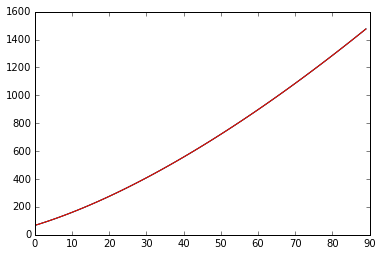

In [194]:
plt.plot(hs_sysmat_m1000)
plt.plot(hs_sysmat_0)
plt.plot(hs_sysmat_p1000)

__Glättung:__

_Jacobi_

In [195]:
n_range = 2**np.arange(1,11)
hs_wjac_m1000 = map(lambda n: hs_norm(to_dense(iteration_matrix_wjac(n,-1000))-to_dense(iteration_matrix_wjac(n,-1000,False))),n_range)
hs_wjac_0 = map(lambda n: hs_norm(to_dense(iteration_matrix_wjac(n,0))-to_dense(iteration_matrix_wjac(n,0,False))),n_range)
hs_wjac_p1000 = map(lambda n: hs_norm(to_dense(iteration_matrix_wjac(n,1000))-to_dense(iteration_matrix_wjac(n,1000,False))),n_range)

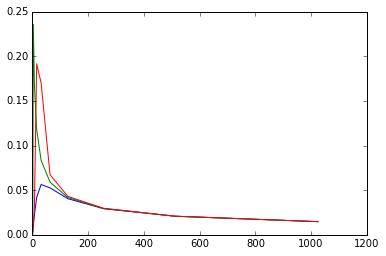

In [196]:
plt.plot(n_range, hs_wjac_m1000)
plt.plot(n_range, hs_wjac_0)
plt.plot(n_range, hs_wjac_p1000)

_Gauss-Seidel_

In [197]:
n_range = 2**np.arange(1,11)
hs_gs_m1000 = map(lambda n: hs_norm(to_dense(iteration_matrix_gs(n,-1000))-to_dense(iteration_matrix_gs(n,-1000,False))),n_range)
hs_gs_0 = map(lambda n: hs_norm(to_dense(iteration_matrix_gs(n,0))-to_dense(iteration_matrix_gs(n,0,False))),n_range)
hs_gs_p1000 = map(lambda n: hs_norm(to_dense(iteration_matrix_gs(n,1000))-to_dense(iteration_matrix_gs(n,1000,False))),n_range)

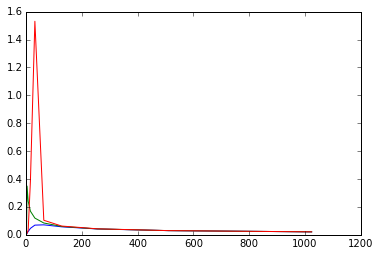

In [198]:
plt.plot(n_range, hs_gs_m1000)
plt.plot(n_range, hs_gs_0)
plt.plot(n_range, hs_gs_p1000)

__Grobgitterkorrektur__

Hier trifft man mal wieder auf das Problem, dass die Freiheitsgrade im periodischen und nicht periodischen Fall unterschiedlich verteilt sind. 

In [199]:
def einmal_einpacken(A):
    return np.r_[[np.zeros(A.shape[0]+1)],np.c_[np.zeros(A.shape[0]),A]]

**Frage**

Welcher _Trick_ wird hier verwendet um mit den unterschiedlichen Dimensionen der Matrizen umzugehen?

In [200]:
n_f_range = 2**np.arange(3,10)
n_c_range = 2**np.arange(2,9)
hs_cgc_m1000 =  map(lambda nf,nc: hs_norm(einmal_einpacken(coarse_grid_correction(nf-1,nc-1,-1000))-coarse_grid_correction_periodic(nf,nc,-1000)),n_f_range ,n_c_range)
hs_cgc_0 =  map(lambda nf,nc: hs_norm(einmal_einpacken(coarse_grid_correction(nf-1,nc-1,0))-coarse_grid_correction_periodic(nf,nc,0.001)),n_f_range ,n_c_range)
hs_cgc_p1000 =  map(lambda nf,nc: hs_norm(einmal_einpacken(coarse_grid_correction(nf-1,nc-1,1000))-coarse_grid_correction_periodic(nf,nc,1000)),n_f_range ,n_c_range)

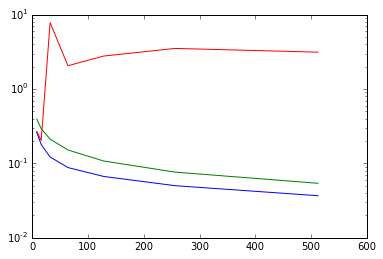

In [201]:
plt.semilogy(n_f_range, hs_cgc_m1000)
plt.semilogy(n_f_range, hs_cgc_0)
plt.semilogy(n_f_range, hs_cgc_p1000)
# plt.semilogy(n_f_range, 1/np.sqrt(n_f_range))

__Zweigitter__

In [202]:
n_f_range = 2**np.arange(3,12)
n_c_range = 2**np.arange(2,11)
hs_2grid_m1000 =  map(lambda nf,nc: hs_norm(
        einmal_einpacken(two_grid_it_matrix(nf-1,nc-1,-1000))-two_grid_it_matrix_periodic(nf,nc,-1000))
                    ,n_f_range ,n_c_range)
hs_2grid_0 =  map(lambda nf,nc: hs_norm(
        einmal_einpacken(two_grid_it_matrix(nf-1,nc-1,0.001))-two_grid_it_matrix_periodic(nf,nc,0.001))
                ,n_f_range ,n_c_range)
hs_2grid_p1000 =  map(lambda nf,nc: hs_norm(
        einmal_einpacken(two_grid_it_matrix(nf-1,nc-1,1000))-two_grid_it_matrix_periodic(nf,nc,1000))
                    ,n_f_range ,n_c_range)

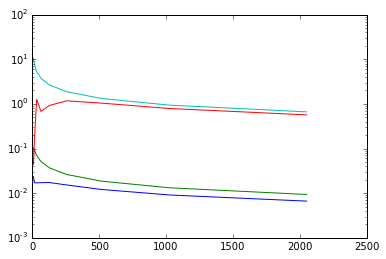

In [203]:
plt.semilogy(n_f_range, hs_2grid_m1000)
plt.semilogy(n_f_range, hs_2grid_0)
plt.semilogy(n_f_range, hs_2grid_p1000)
plt.semilogy(n_f_range, 1/np.sqrt(n_f_range)*30)